In [125]:
import fileinput
import time
import pandas as pd
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [101]:
with open(r"Sandbox/sampleFile.txt", 'r') as myFile:
    dataList = myFile.read().split('\n')

In [207]:
dataStr = dataList[1]

In [208]:
dataDict = json.loads(dataStr.replace("'", "\""))

In [209]:
dfo = pd.DataFrame.from_dict(dataDict['ObdData'])[['Timestamp','ChannelName','Value']]
dfo['Timestamp'] = dfo['Timestamp'].apply(lambda x:int(str(x).split('.')[0]))
dfo['Timestamp'] = dfo['Timestamp'].iloc[-1]
dfo = dfo.pivot(index='Timestamp',columns='ChannelName',values='Value')

dfg = pd.DataFrame(dataDict['GyroscopeData'], index=[0])

for c in dfg.columns:
    dfo[c] = dfg[c].iloc[0]

In [210]:
dfo

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,BarometricPressure,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,IntakeTemp,RPM,Speed,ThrottlePos,Ax,Ay,Az,Gx,Gy,Gz
Timestamp,,,,,,,,,,,,,,,,,,
1676839194,12.54902,2.1,17.0,79.0,73.0,18.431373,67.0,66.27451,17.0,735.0,0.0,15.294118,-0.019287,-0.155762,0.961426,-0.534351,-0.007634,-0.305344


In [212]:
df_final = pd.DataFrame()
i = 0
for dataStr in dataList:
    try:
        dataDict = json.loads(dataStr.replace("'", "\""))
        dfo = pd.DataFrame.from_dict(dataDict['ObdData'])[['Timestamp','ChannelName','Value']]
        dfo['Timestamp'] = dfo['Timestamp'].apply(lambda x:int(str(x).split('.')[0]))
        dfo['Timestamp'] = dfo['Timestamp'].iloc[-1]
        dfo = dfo.pivot(index='Timestamp',columns='ChannelName',values='Value')
        dfg = pd.DataFrame(dataDict['GyroscopeData'], index=[0])
        for c in dfg.columns:
            dfo[c] = dfg[c].iloc[0]
        print(dfo.shape)
        df_final = df_final.append(dfo)
        i+=1
        print(i)
    except:
        i+=1
        print('Failed with: {}'.format(i))


(1, 18)
1
(1, 18)
2
(1, 18)
3
(1, 18)
4
(1, 18)
5
(1, 18)
6
(1, 18)
7
(1, 18)
8
(1, 18)
9
(1, 18)
10
(1, 18)
11
(1, 18)
12
(1, 18)
13
(1, 18)
14
(1, 18)
15
(1, 18)
16
(1, 18)
17
(1, 18)
18
(1, 18)
19
(1, 18)
20
(1, 18)
21
(1, 18)
22
(1, 18)
23
(1, 18)
24
(1, 18)
25
(1, 18)
26
(1, 18)
27
(1, 18)
28
(1, 18)
29
(1, 18)
30
(1, 18)
31
(1, 18)
32
(1, 18)
33
(1, 18)
34
(1, 18)
35
(1, 18)
36
(1, 18)
37
(1, 18)
38
(1, 18)
39
(1, 18)
40
(1, 18)
41
(1, 18)
42
(1, 18)
43
(1, 18)
44
(1, 18)
45
(1, 18)
46
(1, 18)
47
(1, 18)
48
(1, 18)
49
(1, 18)
50
(1, 18)
51
(1, 18)
52
(1, 18)
53
(1, 18)
54
(1, 18)
55
(1, 18)
56
(1, 18)
57
(1, 18)
58
(1, 18)
59
(1, 18)
60
(1, 18)
61
(1, 18)
62
(1, 18)
63
(1, 18)
64
(1, 18)
65
(1, 18)
66
(1, 18)
67
(1, 18)
68
(1, 18)
69
(1, 18)
70
(1, 18)
71
(1, 18)
72
(1, 18)
73
(1, 18)
74
(1, 18)
75
(1, 18)
76
(1, 18)
77
(1, 18)
78
(1, 18)
79
(1, 18)
80
(1, 18)
81
(1, 18)
82
(1, 18)
83
(1, 18)
84
(1, 18)
85
(1, 18)
86
(1, 18)
87
(1, 18)
88
(1, 18)
89
(1, 18)
90
(1, 18)
91
(1, 18)


In [214]:
df_final.to_csv('addedGyroscope.csv')

(0.0, 500.0)

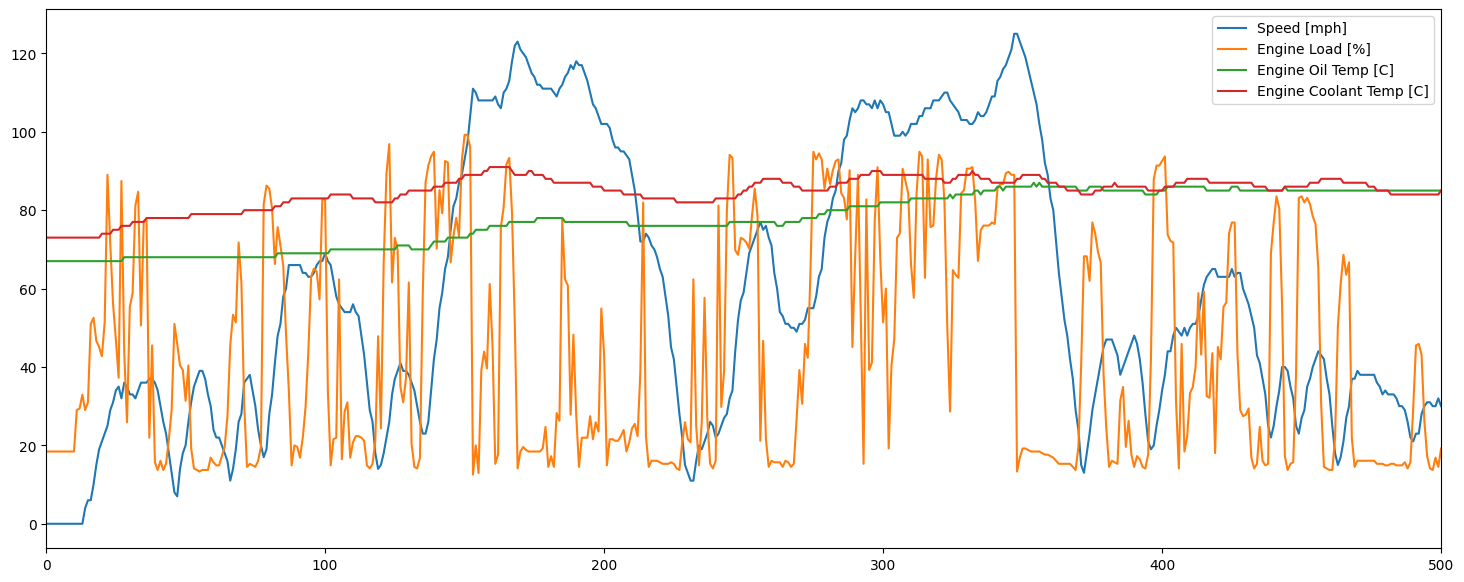

In [225]:
plt.rcParams['figure.figsize'] = [18, 7]
df_final.reset_index()['Speed'].plot(label='Speed [kph]')
df_final.reset_index()['EngineLoad'].plot(label='Engine Load [%]')
df_final.reset_index()['EngineOilTemp'].plot(label='Engine Oil Temp [C]')
df_final.reset_index()['CoolantTemp'].plot(label='Engine Coolant Temp [C]')






plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

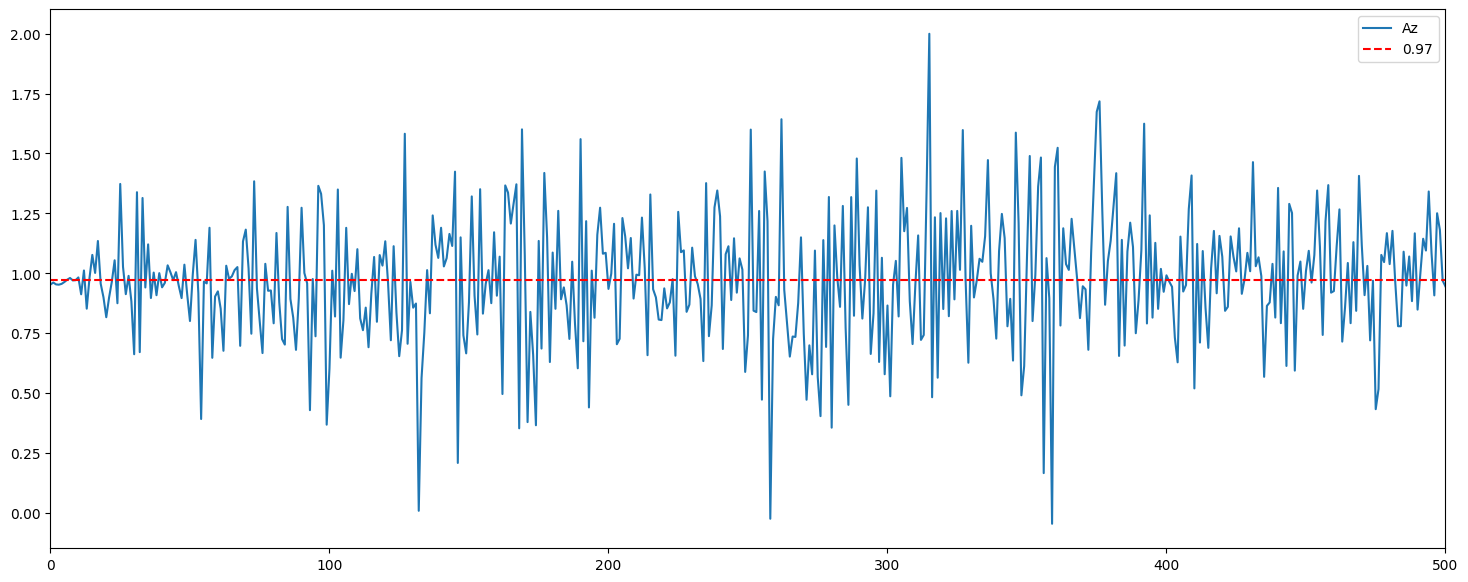

In [233]:
df_final.reset_index()['Az'].plot(label='Az')

plt.axhline(df_final['Az'].mean(), color='red', linestyle='--', label='{}'.format(round(df_final['Az'].mean(),2)))

plt.legend()
plt.xlim(0,500)

In [142]:
df_final

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,BarometricPressure,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,IntakeTemp,RPM,Speed,ThrottlePos
Timestamp,,,,,,,,,,,,
1676839193,12.549020,2.09,17.0,79.0,73.0,18.431373,67.0,66.274510,17.0,739.75,0.0,15.294118
1676839194,12.549020,2.10,17.0,79.0,73.0,18.431373,67.0,66.274510,17.0,735.00,0.0,15.294118
1676839195,12.549020,2.09,17.0,79.0,73.0,18.431373,67.0,66.274510,17.0,740.50,0.0,15.294118
1676839197,12.549020,2.12,17.0,79.0,73.0,18.431373,67.0,66.274510,17.0,735.75,0.0,15.294118
1676839198,12.549020,2.07,17.0,79.0,73.0,18.431373,67.0,66.274510,17.0,739.75,0.0,15.294118
...,...,...,...,...,...,...,...,...,...,...,...,...
1676841925,9.411765,3.12,16.0,79.0,84.0,14.117647,85.0,67.843137,16.0,1354.50,31.0,16.470588
1676841927,9.411765,3.14,17.0,79.0,84.0,13.725490,85.0,71.372549,17.0,1351.50,30.0,16.470588
1676841928,11.764706,4.26,17.0,79.0,84.0,16.862745,85.0,67.058824,17.0,1459.25,30.0,17.254902


In [144]:
dataDict

{'ObdData': [{'Timestamp': 1676841930.4564443,
   'ChannelName': 'RPM',
   'Value': 1425.0,
   'Units': 'revolutions_per_minute',
   'Cmd': 'Engine RPM'},
  {'Timestamp': 1676841930.4729872,
   'ChannelName': 'Speed',
   'Value': 30.0,
   'Units': 'kph',
   'Cmd': 'Vehicle Speed'},
  {'Timestamp': 1676841930.4889607,
   'ChannelName': 'EngineLoad',
   'Value': 19.215686274509803,
   'Units': 'percent',
   'Cmd': 'Calculated Engine Load'},
  {'Timestamp': 1676841930.5045497,
   'ChannelName': 'CoolantTemp',
   'Value': 85.0,
   'Units': 'degC',
   'Cmd': 'Engine Coolant Temperature'},
  {'Timestamp': 1676841930.520283,
   'ChannelName': 'IntakeTemp',
   'Value': 17.0,
   'Units': 'degC',
   'Cmd': 'Intake Air Temp'},
  {'Timestamp': 1676841930.5362666,
   'ChannelName': 'FuelLevel',
   'Value': 67.45098039215686,
   'Units': 'percent',
   'Cmd': 'Fuel Level Input'},
  {'Timestamp': 1676841930.5521939,
   'ChannelName': 'AmbientTemp',
   'Value': 17.0,
   'Units': 'degC',
   'Cmd': 'Ambi

In [169]:
pd.concat([dfo, dfg], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1676839193,12.54902,2.09,17.0,79.0,73.0,18.431373,67.0,66.27451,17.0,739.75,0.0,15.294118,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.041504,-0.133545,0.952881,-0.389313,-0.129771,-0.267176


In [170]:
dfo

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,BarometricPressure,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,IntakeTemp,RPM,Speed,ThrottlePos
Timestamp,,,,,,,,,,,,
1676839193,12.54902,2.09,17.0,79.0,73.0,18.431373,67.0,66.27451,17.0,739.75,0.0,15.294118


In [195]:
dfa = dfo.append(dfg).fillna('')

In [197]:
dfo

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,BarometricPressure,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,IntakeTemp,RPM,Speed,ThrottlePos,Ax,Ay,Az,Gx,Gy,Gz
Timestamp,,,,,,,,,,,,,,,,,,
1.676839e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739.75,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,NaN,18.431373,NaN,NaN,NaN,NaN,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.27451,NaN,NaN,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
1.676839e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.294118,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344


In [181]:
dfo['A'] = 123

In [203]:
for c in dfg.columns:
    dfo[c] = dfg[c].iloc[0]

In [201]:
dfg = pd.DataFrame(dataDict['GyroscopeData'], index=[0])

In [204]:
dfo

ChannelName,AbsoluteLoad,AirFlowRate,AmbientTemp,BarometricPressure,CoolantTemp,EngineLoad,EngineOilTemp,FuelLevel,IntakeTemp,RPM,Speed,ThrottlePos,Ax,Ay,Az,Gx,Gy,Gz
Timestamp,,,,,,,,,,,,,,,,,,
1676841930,15.686275,11.9,17.0,79.0,85.0,19.215686,85.0,67.45098,17.0,1425.0,30.0,20.0,-0.146729,-0.104248,0.945068,-5.503817,6.29771,2.305344
